<a href="https://colab.research.google.com/github/uirom/practice/blob/main/%EB%B6%84%EB%A5%98_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# 데이터 분석을 위한 패키지
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from pylab import rcParams

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 경고 메세지를 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# df_knn.head() 함수를 통해 데이터를 확인
df_knn = pd.read_csv('/content/df_titanic.csv')

df_knn.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_1
0,0,22.0,1,0,1.981001,0,1,1
1,1,38.0,1,0,4.266662,0,0,0
2,1,26.0,0,0,2.070022,0,1,0
3,1,35.0,1,0,3.972177,0,0,0
4,0,35.0,0,0,2.085672,0,1,1


In [ ]:
# k의 수를 3, weights는 uniform(거리에 가중치 부여하지 않음)으로 하고 fit()을 해본다.
# 시각화를 통해 k가 3일때 어떻게 분류하는지 확인

# x(Fare, Age)/ y(Survived)
x = np.array(df_knn[['Fare','Age']])
y = np.array(df_knn['Survived'])

# uniform : 거리에 가중치를 부여하지 않는다
clf = KNeighborsClassifier(3, weights='uniform')
clf.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

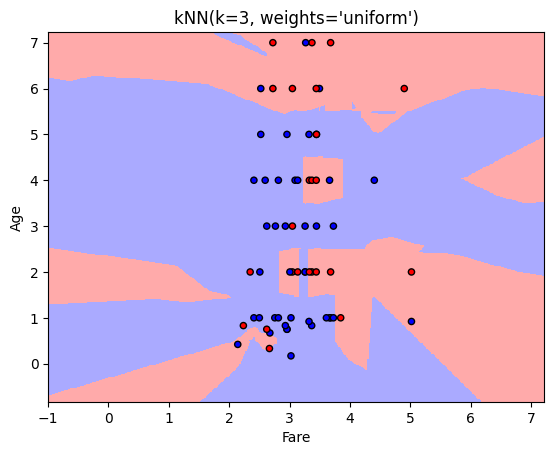

In [ ]:
# KNN 시각화 함수이다
def graph_knn(n_neighbors, weights):
  h = .02

  cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
  cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

  x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
  y_min, y_max = x[:,1].min()-1, x[:,0].max()+1

  xx,yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
  pred_=np.c_[xx.ravel(),yy.ravel()]

  Z = clf.predict(pred_)
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  plt.scatter(x[:,0], x[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("kNN(k=%i, weights='%s')" % (n_neighbors, weights))

  plt.xlabel("Fare")
  plt.ylabel("Age")
  plt.show()

graph_knn(clf.n_neighbors,clf.weights)

In [ ]:
# GridSearchCV를 통하여 좀 더 최적화된 파라미터를 찾아서 다시 fit()시킨다

knn = KNeighborsClassifier()
k_range = list(range(1,100))
# uniform: 거리에 가중치를 부여하지 않음(X). / distance: 거리에 가중치를 부여함(O)
weights_options = ['uniform', 'distance']

k_grid = dict(n_neighbors = k_range, weights = weights_options)
clf = GridSearchCV(knn, k_grid, cv=10, scoring='accuracy')
clf.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
df_clf = pd.DataFrame(clf.cv_results_)
df_clf[['param_n_neighbors', 'param_weights', 'params', 'mean_test_score', 'rank_test_score']].sort_values(['rank_test_score']).head()

,param_n_neighbors,param_weights,params,mean_test_score,rank_test_score
40,21,uniform,"{'n_neighbors': 21, 'weights': 'uniform'}",0.663471,1
46,24,uniform,"{'n_neighbors': 24, 'weights': 'uniform'}",0.661584,2
38,20,uniform,"{'n_neighbors': 20, 'weights': 'uniform'}",0.660623,3
42,22,uniform,"{'n_neighbors': 22, 'weights': 'uniform'}",0.660614,4
44,23,uniform,"{'n_neighbors': 23, 'weights': 'uniform'}",0.658690,5


In [ ]:
# rank_test_score 1위를 기준으로 k의수가 21일 때가 가장 높은 mean_test_score를 보여준다

print("최고 Score:", str(clf.best_score_))
print("최적의 parameters:", str(clf.best_params_))
print("최적의 Estimators:", str(clf.best_estimator_))

최고 Score: 0.663470695970696
최적의 parameters: {'n_neighbors': 21, 'weights': 'uniform'}
최적의 Estimators: KNeighborsClassifier(n_neighbors=21)


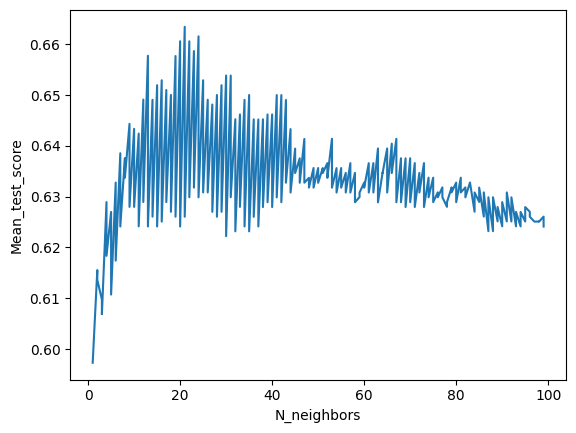

In [ ]:
# k의 수가 변함에 따라 mean_test_score가 어떻게 달라지는지 시각화를 통해 살펴보자.

plt.plot(df_clf['param_n_neighbors'], df_clf['mean_test_score'])
plt.xlabel('N_neighbors')
plt.ylabel('Mean_test_score')
plt.show()

# k의 수가 20정도로 갈때까진 mean_test_score가 상승했지만, 그 후로는 k의 수가 늘어날수록 score가 하락하는 모습을 보임.
# k의 수가 21땐 어떻게 그래프로 분류하는지 살펴보기

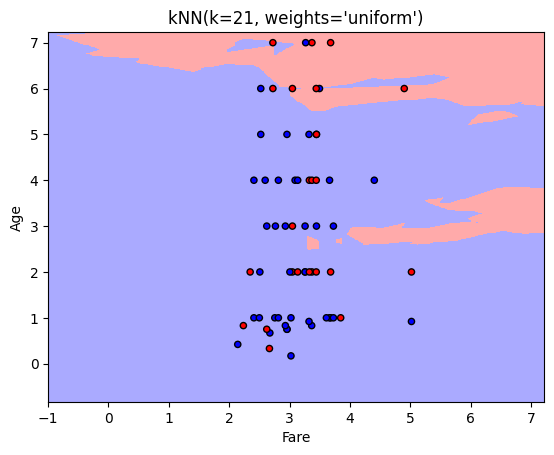

In [ ]:
# kNN 시각화 함수를 호출
graph_knn(clf.best_params_['n_neighbors'], clf.best_params_['weights'])

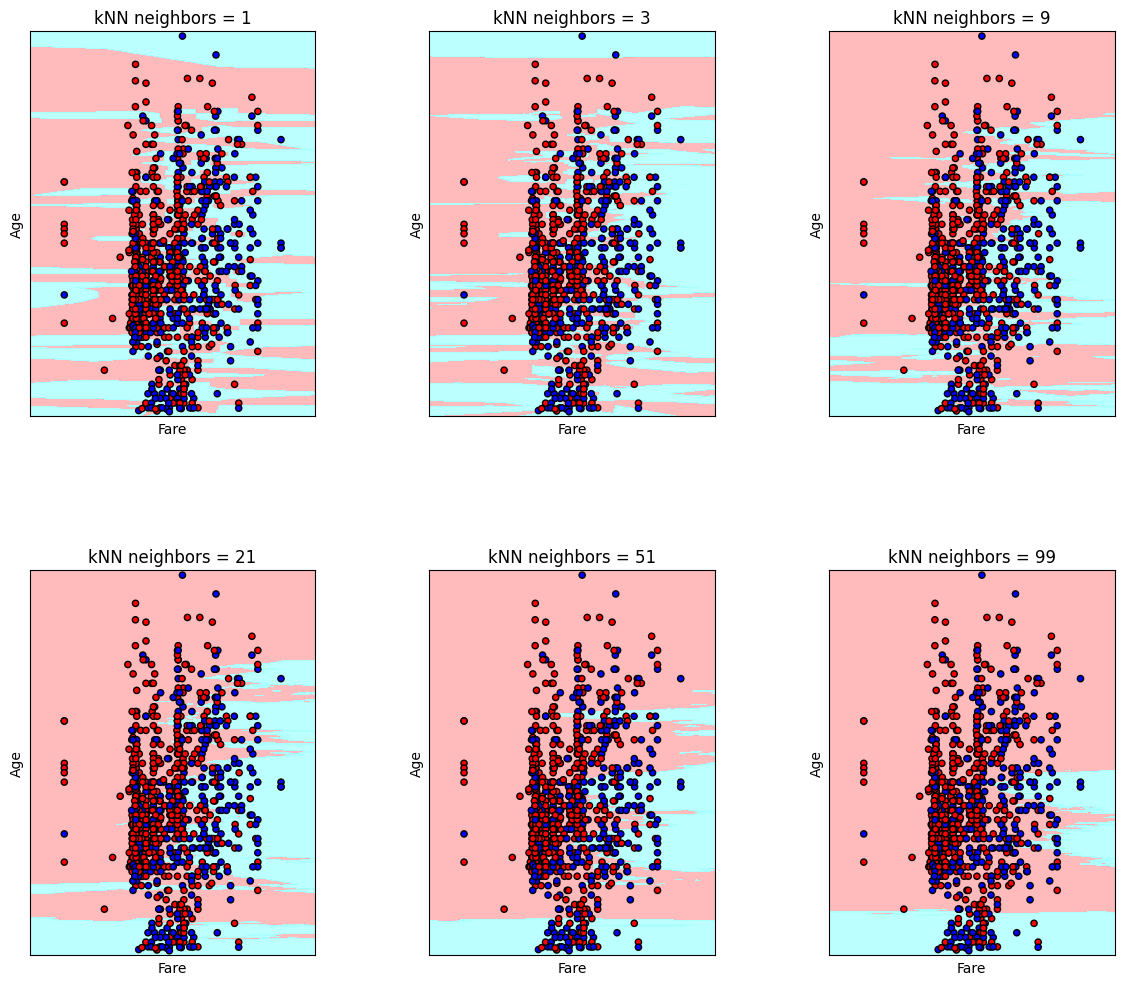

In [ ]:
# k의 수가 3일때보다 훨씬 분류가 잘된것을 확인할 수 있다. [but, 실행결과 4번째 코딩부터 KNN값의 포인트들이 제대로 보이지 않음.]
# k의 수에 따라 어떻게 분류선이 변화하는지 한번에 살펴보자.

def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx,yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx,yy,Z,**params)
  return out

cmap_light = ListedColormap(['#FFAAAA', '#AAFFFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# "figure.figsize": 그림(figure)의 크기. (가로, 세로)인치 단위입니다.
# default값으로 다시 설정하고 싶을 경우 사용 전 default값을 미리 확인한다.
rcParams['figure.figsize'] = 14, 12

models = (KNeighborsClassifier(1, weights='uniform'),
          KNeighborsClassifier(3, weights='uniform'),
          KNeighborsClassifier(9, weights='uniform'),
          KNeighborsClassifier(21, weights='uniform'),
          KNeighborsClassifier(51, weights='uniform'),
          KNeighborsClassifier(99, weights='uniform'))

models = (clf.fit(x, y)for clf in models)

# kNN의 수에 따른 타이틀
titles=('kNN neighbors = 1',
        'kNN neighbors = 3',
        'kNN neighbors = 9',
        'kNN neighbors = 21',
        'kNN neighbors = 51',
        'kNN neighbors = 99')

# 2X3 플로팅합니다
fig, sub = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x0,x1 = x[:,0],x[:,1]
xx,yy = make_meshgrid(x0, x1)

for clf, title, ax in zip(models, titles, sub.flatten()):
  plot_contours(ax, clf, xx, yy,
                cmap=cmap_light, alpha=0.8)
  ax.scatter(x0, x1, c=y, cmap=cmap_bold, s=20, edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xlabel('Fare')
  ax.set_ylabel('Age')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)

plt.show()

# 결과: k=1, k=2~ K=99까지 비교한 결과 k=21일때 가장 적절하게 분류선을 분류한것으로 보이며,
#      K=21보다 커질때 사망(Survived=0)으로 더 많이 분류됨을 확인